In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=13)  

# Convergence des estimateurs

- Population de moyenne $\mu_0$ et de écart-type $\sigma_0$ (et de variance $\sigma_0^2$)
- Mesure -ou estimation- de la moyenne, sur un échantillon comportant $N$ individus
- la moyenne mesurée est $\tilde \mu = \sum y_i/N$

- L'écart-type de la moyenne mesurée converge en $1/\sqrt{N}$: 

$$
\sigma(\tilde \mu) = \frac{\sigma_0}{\sqrt{N}}
$$

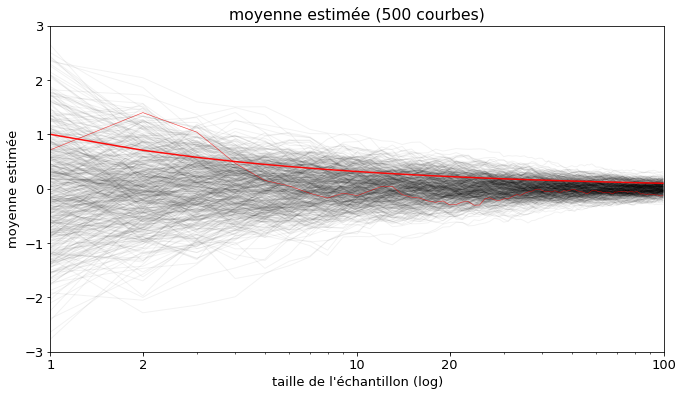

In [2]:
import random

nbrs_courbes = 500

n_Min, n_Max = 1, 100

ylim0 = 3
plt.figure(figsize=(11, 6)  )

n_span = range(n_Min, n_Max)

for k in range( nbrs_courbes ):
    Xn = np.random.normal(loc=0.0, scale=1.0, size=n_Max) 

    moy_esti = [ Xn[:i].mean() for i in n_span  ]
    
    plt.semilogx(n_span, moy_esti , 'k', alpha=0.05, lw=1.0 );
    
# Un exemple de courbe:    
plt.semilogx(n_span,  moy_esti , 'r', alpha=.8, lw=0.5 );


# Ecart-type de la mesure : 
sigma_moy = 1.0/np.sqrt( np.array(n_span) )
plt.plot(n_span, sigma_moy, 'r', alpha=0.94, lw=1.5 );


plt.xlim([n_Min, n_Max]); plt.ylim([-ylim0, ylim0 ]);
plt.xlabel(u'taille de l\'échantillon (log)'), plt.ylabel(u'moyenne estimée');
plt.title( u"moyenne estimée (500 courbes)" );

x_lab, labels = [1, 2, 10, 20, 100], ['1', '2', '10', '20', '100']
plt.xticks(x_lab, labels); # , rotation='vertical'

_question bête:_ Est-ce que la connaissance de la distribution attendue peut améliorer l'estimation ? c.a.d. faire un fit par une loi gaussienne...

## Estimation et convergence de l'écart-type

In [16]:
N = 60000

In [17]:
Xn = np.random.exponential(scale=1.0, size=N) 

In [18]:
Xn.mean()

1.0031489566423544

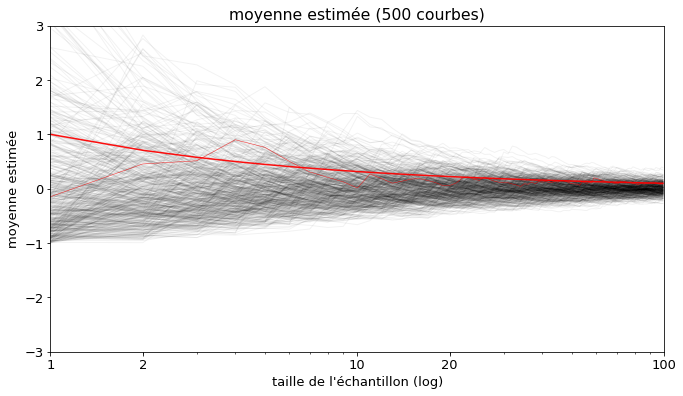

In [20]:

nbrs_courbes = 500

n_Min, n_Max = 1, 100

ylim0 = 3
plt.figure(figsize=(11, 6)  )

n_span = range(n_Min, n_Max)

for k in range( nbrs_courbes ):
    Xn = np.random.exponential(scale=1.0, size=n_Max) - 1

    moy_esti = [ Xn[:i].mean() for i in n_span  ]
    
    plt.semilogx(n_span, moy_esti , 'k', alpha=0.05, lw=1.0 );
    
# Un exemple de courbe:    
plt.semilogx(n_span,  moy_esti , 'r', alpha=.8, lw=0.5 );


# Ecart-type de la mesure : 
sigma_moy = 1.0/np.sqrt( np.array(n_span) )
plt.plot(n_span, sigma_moy, 'r', alpha=0.94, lw=1.5 );


plt.xlim([n_Min, n_Max]); plt.ylim([-ylim0, ylim0 ]);
plt.xlabel(u'taille de l\'échantillon (log)'), plt.ylabel(u'moyenne estimée');
plt.title( u"moyenne estimée (500 courbes)" );

x_lab, labels = [1, 2, 10, 20, 100], ['1', '2', '10', '20', '100']
plt.xticks(x_lab, labels); # , rotation='vertical'

In [90]:
N = 10
Xn = np.random.exponential(scale=1., size=N)-1

print( Xn.mean() )

Fexp = np.linspace( 0, 1, len(Xn) )
xFexp = np.sort( Xn )



0.424779876441


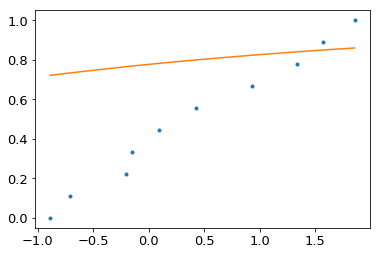

In [91]:
plt.plot(  xFexp, Fexp , '.' )
plt.plot(  xFexp, Ftheo( xFexp, 4., -5 ) )

In [92]:
import scipy.optimize

cost = lambda p: np.sum( ( Ftheo( xFexp, p[0], p[1] ) - Fexp  )**2 )
xopt = scipy.optimize.fmin(func=cost, x0=[1, 0])

print( xopt )

Optimization terminated successfully.
         Current function value: 0.053811
         Iterations: 57
         Function evaluations: 108
[ 1.44338545  0.18393873]


In [93]:
print( xopt[1] )
print( np.mean( Xn ) )

0.183938730909
0.424779876441


In [113]:
def Ftheo( x, lmda, mu ):
    F = 1 - np.exp( -(x-mu+1)/lmda )
    return F

def estimateMean(  X ):
    Fexp = np.linspace( 0, 1, len(Xn) )
    xFexp = np.sort( Xn )

    cost = lambda p: np.sum( ( Ftheo( xFexp, p[0], p[1] ) - Fexp  )**2 )
    xopt = scipy.optimize.fmin(func=cost, x0=[1.2, 1], disp=False)
    
    return np.mean( X ), xopt[1]

/home/etienne/xdze2_website/py3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/etienne/xdze2_website/py3/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in square


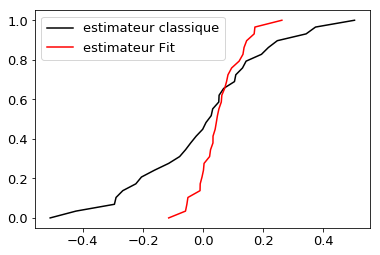

In [117]:
N = 20

all_mu = []
all_muFit = []
for i in range(30):
    Xn = np.random.exponential(scale=1., size=N)-1
    mu, muFit = estimateMean(  Xn  )
    all_mu.append( mu )
    all_muFit.append( muFit )
    
all_mu.sort()
all_muFit.sort()
F = np.linspace( 0, 1, len(all_mu) )
plt.plot( all_mu, F, 'k', label='estimateur classique' )
plt.plot( all_muFit, F, 'r', label='estimateur Fit'  )
plt.legend();

il existe une fonction pour faire cela: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit

In [ ]:


t.pdf(x, k)